                                         Machine Learning Project

## Customer Segmentation using Machine Learning

## Group Members
Ali Raza (21K-4703)

Syed Saadullah Hussaini (21K-4736)

Muhammad Sameed (21K-3100)

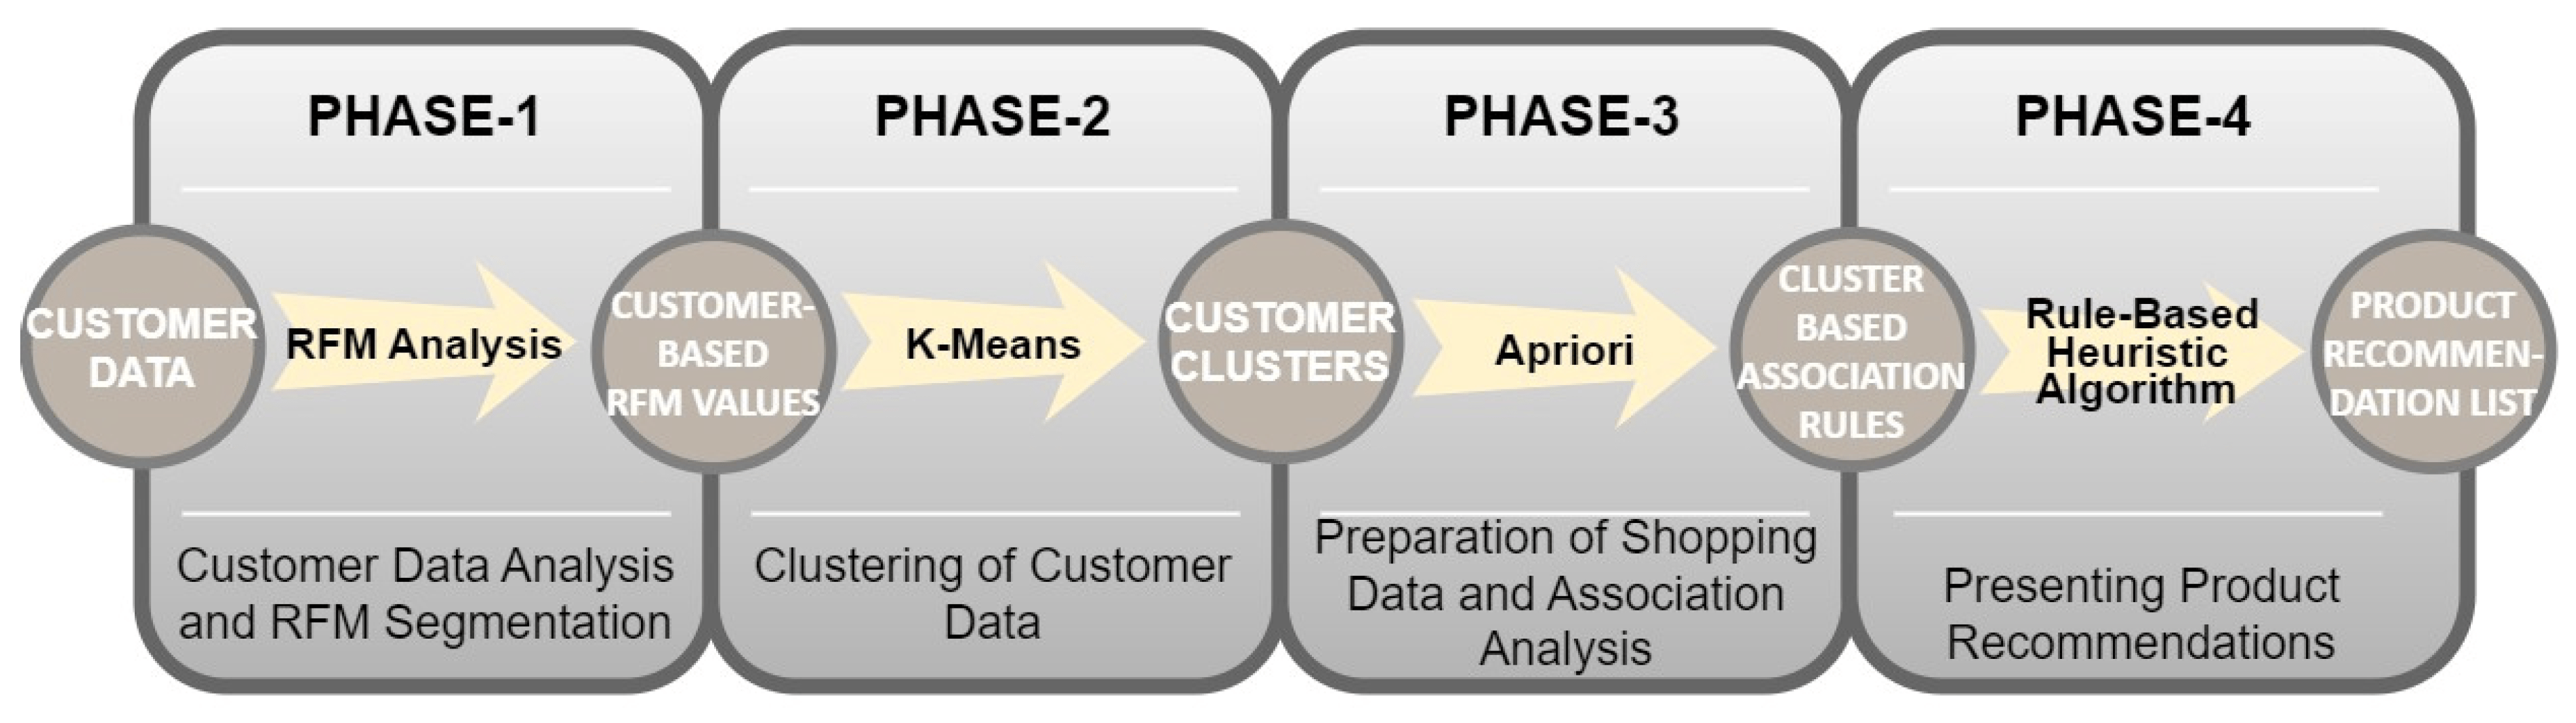

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
data=pd.read_csv("customers.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Preprocessing

In [4]:
data=data.drop(columns=["ID", "Recency", "Complain"],axis=1)
data.shape

(2240, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [6]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
data.shape

(2240, 26)

In [10]:
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any() 

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

# Feature Engineering

In [11]:
data = data.drop(['Z_CostContact', 'Z_Revenue'],axis=1) # not describing any relevant information
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,...,5,3,6,5,0,0,0,0,0,0


In [12]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [13]:
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PostGrad')  
data['Education'] = data['Education'].replace(['Basic'], 'UnderGrad')
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,PostGrad,Single,58138.0,0,0,04-09-2012,635,88,546,...,8,10,4,7,0,0,0,0,0,1
1,1954,PostGrad,Single,46344.0,1,1,08-03-2014,11,1,6,...,1,1,2,5,0,0,0,0,0,0
2,1965,PostGrad,Together,71613.0,0,0,21-08-2013,426,49,127,...,8,2,10,4,0,0,0,0,0,0
3,1984,PostGrad,Together,26646.0,1,0,10-02-2014,11,4,20,...,2,0,4,6,0,0,0,0,0,0
4,1981,PostGrad,Married,58293.0,1,0,19-01-2014,173,43,118,...,5,3,6,5,0,0,0,0,0,0


In [14]:
data['Marital_Status'].value_counts()  

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Not Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [16]:
data['Marital_Status'].value_counts()  

Marital_Status
Not Single    1444
Single         796
Name: count, dtype: int64

In [17]:
product_data = []
for i in range(0, len(data)):
  productdata = [data['MntWines'][i], data['MntFruits'][i], 
                  data['MntMeatProducts'][i], data['MntFishProducts'][i], 
                  data['MntSweetProducts'][i], data['MntGoldProds'][i]]
  product_data.append(productdata)
Products_DF = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_DF.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [18]:
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [19]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data['first_day'] = '01-01-2015'
data['first_day'] = pd.to_datetime(data['first_day'])
data['day_engaged'] = (data['first_day'] - data['Dt_Customer']).dt.days

In [20]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" ,"Dt_Customer", "first_day","AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=col_del,axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
0,1957,PostGrad,Single,58138.0,0,1617,1,25,849
1,1954,PostGrad,Single,46344.0,2,27,0,6,299
2,1965,PostGrad,Not Single,71613.0,0,776,0,21,498
3,1984,PostGrad,Not Single,26646.0,1,53,0,8,325
4,1981,PostGrad,Not Single,58293.0,1,422,0,19,347


In [21]:
data['Age'] = 2023 - data["Year_Birth"]
data=data.drop('Year_Birth',axis=1)

In [22]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged,Age
0,PostGrad,Single,58138.0,0,1617,1,25,849,66
1,PostGrad,Single,46344.0,2,27,0,6,299,69
2,PostGrad,Not Single,71613.0,0,776,0,21,498,58
3,PostGrad,Not Single,26646.0,1,53,0,8,325,39
4,PostGrad,Not Single,58293.0,1,422,0,19,347,42


# Phase 1 
## EDA

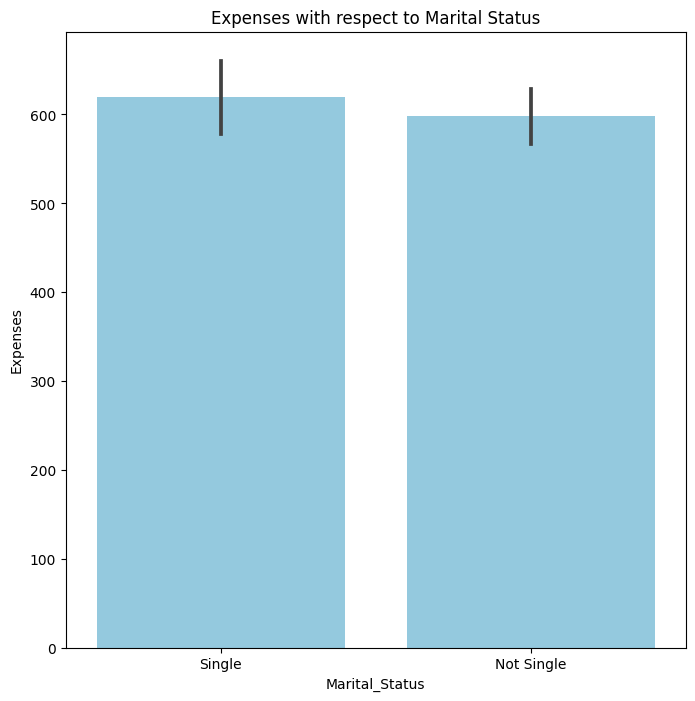

In [23]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Marital_Status'], y=data['Expenses'], color='skyblue')
plt.title("Expenses with respect to Marital Status")
plt.show()

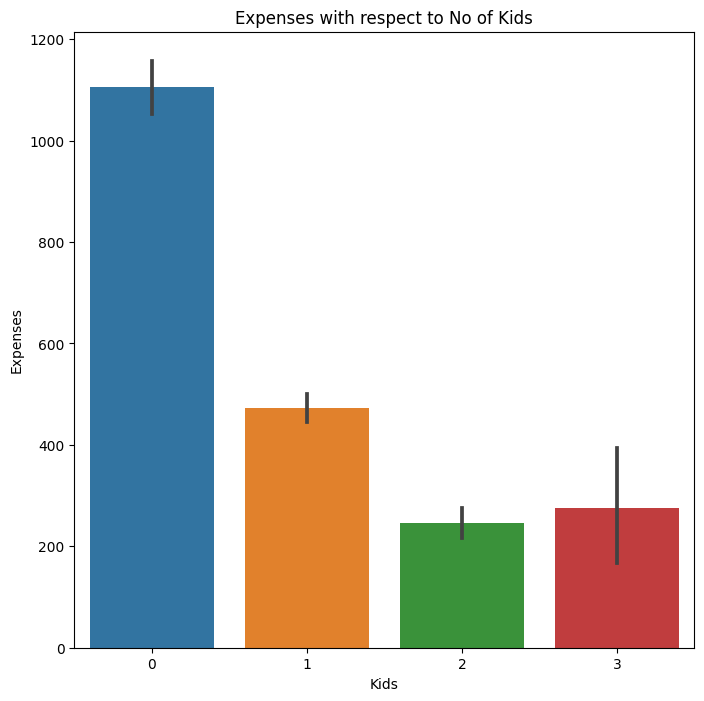

In [24]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Kids'], y=data['Expenses'])
plt.title("Expenses with respect to No of Kids")
plt.show()

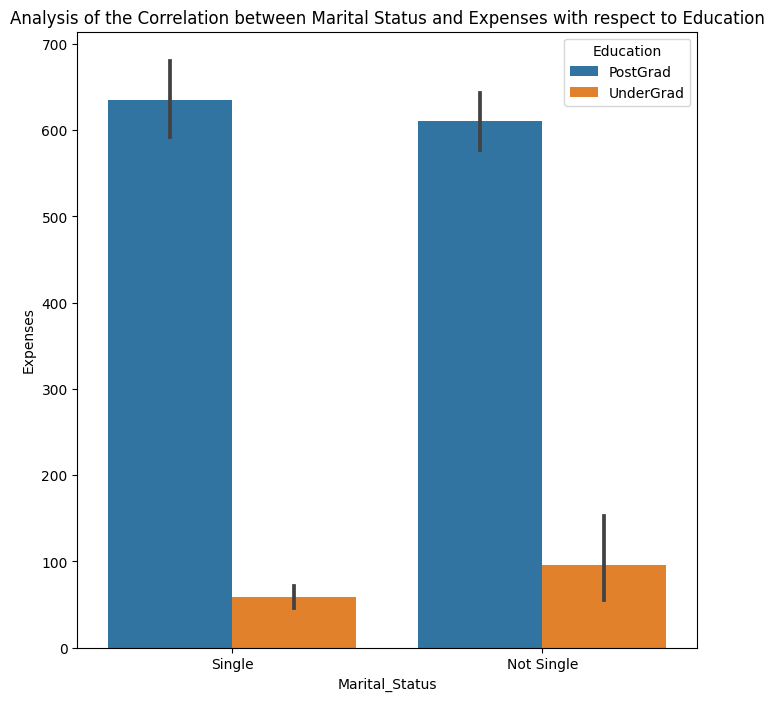

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Marital_Status'], y=data['Expenses'], hue = data["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

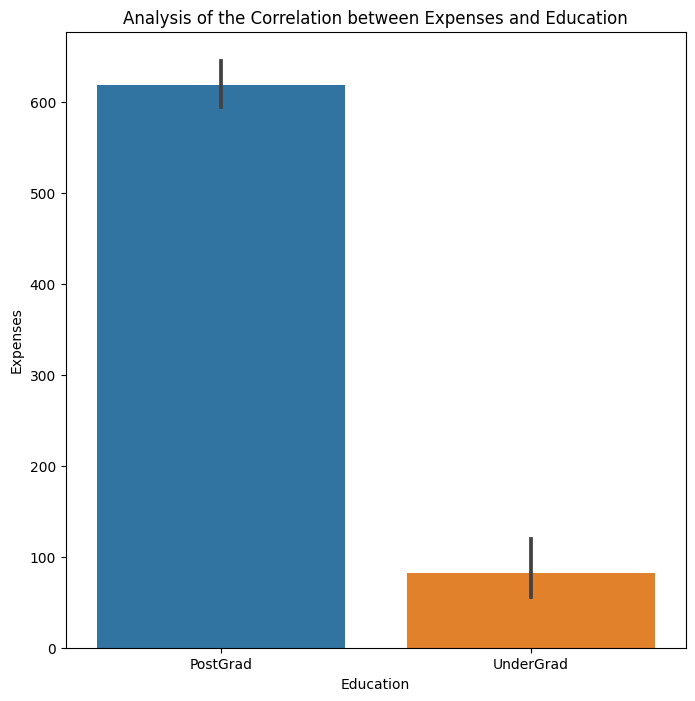

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Education'], y=data['Expenses'])
plt.title("Analysis of the Correlation between Expenses and Education")
plt.show()

In [27]:
data['Income'].mean()

52247.25135379061

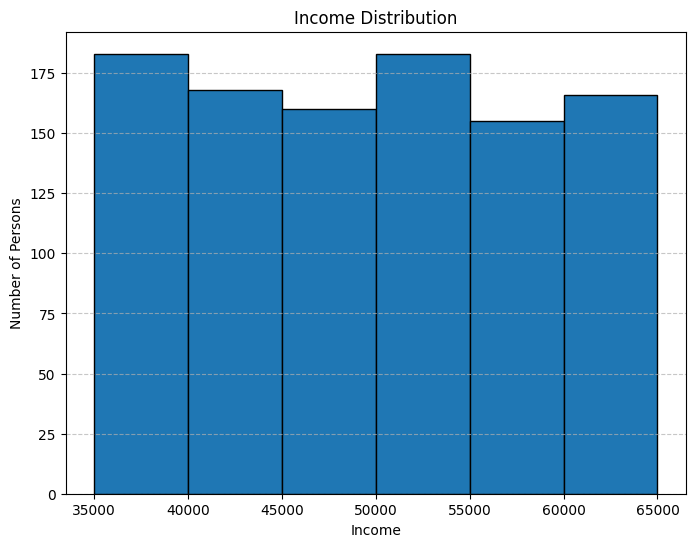

In [28]:
income_ranges = [35000, 40000, 45000, 50000, 55000, 60000,65000]
plt.figure(figsize=(8, 6))
plt.hist(data['Income'], bins=income_ranges, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Persons')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Enconding Categorical Values

In [29]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
object_cols = data.select_dtypes(include=['object']).columns
for col in object_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged,Age
0,0,1,58138.0,0,1617,1,25,849,66
1,0,1,46344.0,2,27,0,6,299,69
2,0,0,71613.0,0,776,0,21,498,58
3,0,0,26646.0,1,53,0,8,325,39
4,0,0,58293.0,1,422,0,19,347,42


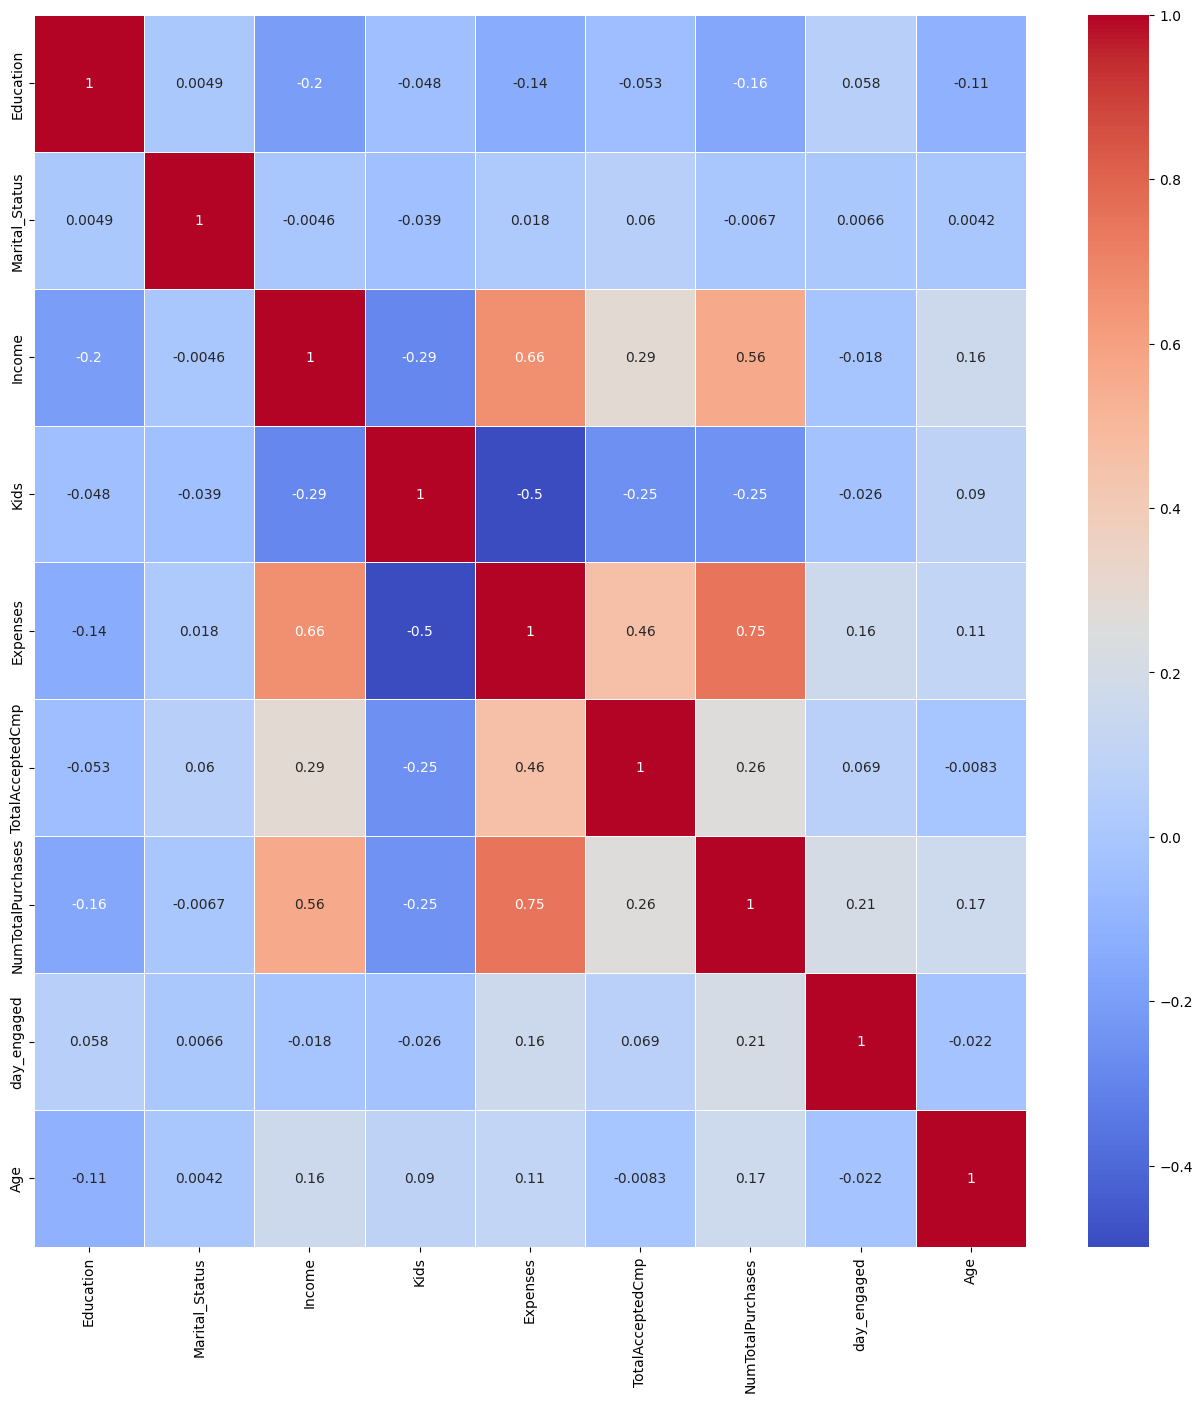

In [30]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

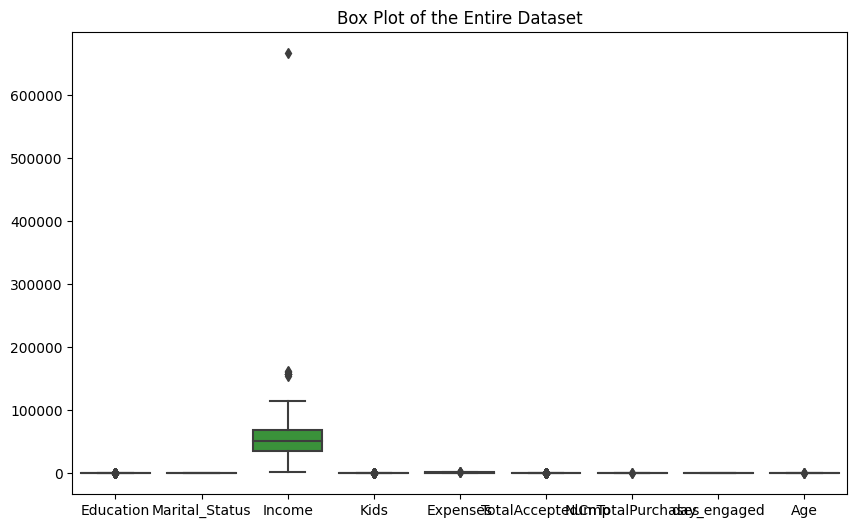

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of the Entire Dataset')
plt.show()

In [32]:
from math import sqrt
q3 = data.quantile(0.75)
q1 = data.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)
data= data[~( (data < lower_range)|(data > upper_range) ).any(axis=1)]


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [34]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged,Age
0,0,1,58138.0,0,1617,1,25,849,66
1,0,1,46344.0,2,27,0,6,299,69
2,0,0,71613.0,0,776,0,21,498,58
3,0,0,26646.0,1,53,0,8,325,39
4,0,0,58293.0,1,422,0,19,347,42


# Phase 2 
## Kmeans

C:\Users\Saadu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saadu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saadu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

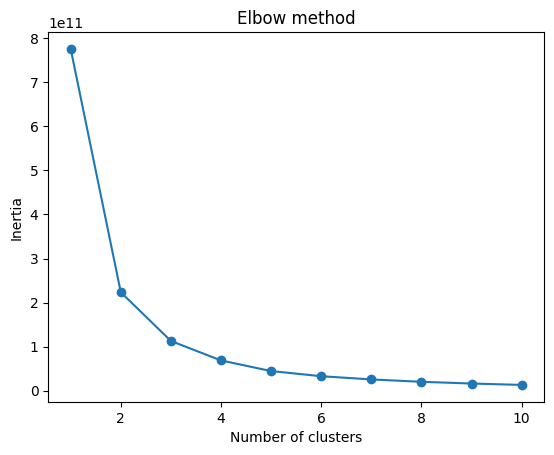

In [35]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
pred=kmeans.predict(data)
data['cluster'] = pred + 1


C:\Users\Saadu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged,Age,cluster
0,0,1,58138.0,0,1617,1,25,849,66,1
1,0,1,46344.0,2,27,0,6,299,69,2
2,0,0,71613.0,0,776,0,21,498,58,1
3,0,0,26646.0,1,53,0,8,325,39,2
4,0,0,58293.0,1,422,0,19,347,42,1


In [38]:
data['cluster'].value_counts()

cluster
1    1019
2    1003
Name: count, dtype: int64

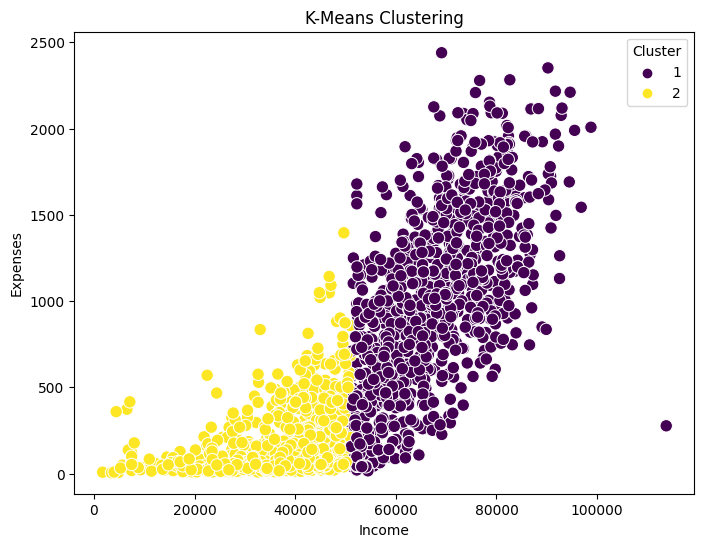

In [39]:
a = data['Income']
b = data['Expenses']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=a, y=b, hue=data['cluster'], palette='viridis', s=80)
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.legend(title='Cluster')
plt.show()


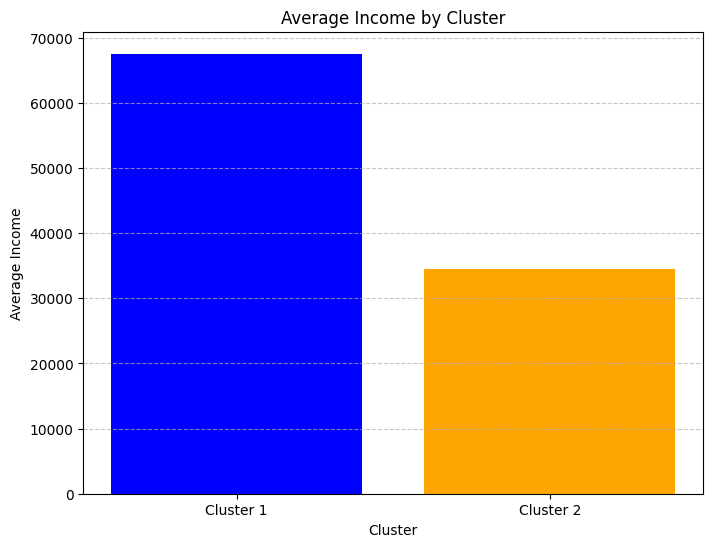

In [40]:
cluster_1_data = data[data['cluster'] == 1]['Income']
cluster_2_data = data[data['cluster'] == 2]['Income']
plt.figure(figsize=(8, 6))
plt.bar(['Cluster 1', 'Cluster 2'], [cluster_1_data.mean(), cluster_2_data.mean()], color=['blue', 'orange'])
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

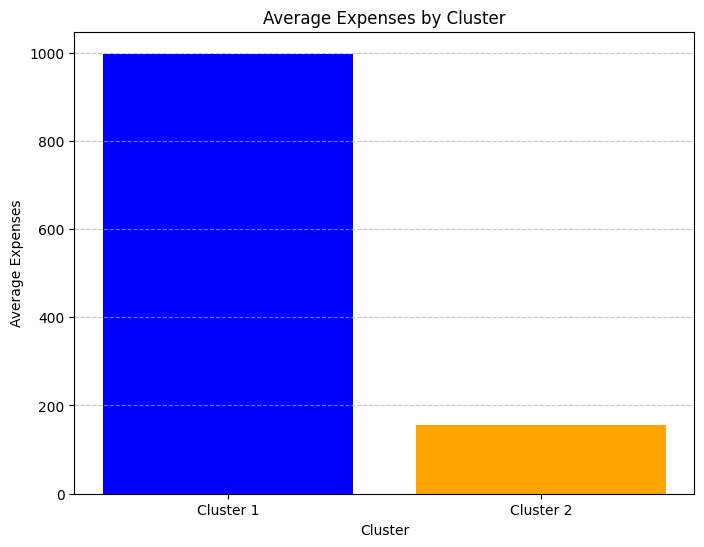

In [41]:
cluster_1_data = data[data['cluster'] == 1]['Expenses']
cluster_2_data = data[data['cluster'] == 2]['Expenses']
plt.figure(figsize=(8, 6))
plt.bar(['Cluster 1', 'Cluster 2'], [cluster_1_data.mean(), cluster_2_data.mean()], color=['blue', 'orange'])
plt.title('Average Expenses by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Expenses')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Observation:
Based on above information we can divide customers into 2 parts while observing their expenses:-

Highly Active Customer :- These customers belong to cluster one.

Least Active Customer :- These customers belong to cluster two.

# Phase 3

## Apriori Algorithm for association

In [42]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [43]:
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)

In [44]:
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)


In [45]:
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['dayengaged_group'] = pd.qcut(data['day_engaged'], q=4, labels=cut_labels_dayengaged)
data=data.drop(columns=['Age','Income','day_engaged'])

In [46]:
cut_labels = ['Least Active Customer', 'Highly Active Customer']
data['Wines_segment'] = pd.qcut(Products_DF['Wines'][Products_DF['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(Products_DF['Fruits'][Products_DF['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(Products_DF['Meat'][Products_DF['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(Products_DF['Fish'][Products_DF['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(Products_DF['Sweets'][Products_DF['Sweets']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(Products_DF['Gold'][Products_DF['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Inactive Customer",inplace=True)
data = data.astype(object)

In [47]:
data.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,1,0,1617,1,25,1,Senior,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,1,2,27,0,6,2,Senior,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,0,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,0,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,0,0,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

In [49]:
association = data.copy() 
association.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,1,0,1617,1,25,1,Senior,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,1,2,27,0,6,2,Senior,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,0,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,0,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,0,0,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


In [50]:
association.drop(["Education", "Marital_Status", "Kids", "Expenses", "TotalAcceptedCmp", "NumTotalPurchases", "cluster"], axis = 1, inplace = True)
association.head()

,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Senior,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,Senior,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


## Setting the Association Rules

In [51]:
df_ap = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

## Finding the "Least Active Customers" when it comes to "Fruits"

In [52]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7501,"(Gold_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.086,0.394,0.080,0.936,2.379,0.046,9.536,0.634
4628,"(Meat_segment_Highly Active Customer, Income_group_High income, Gold_segment_Highly Active Customer, Age_group_Mature)",(Fruits_segment_Highly Active Customer),0.093,0.394,0.087,0.936,2.378,0.050,9.499,0.639
8352,"(Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.169,0.394,0.158,0.936,2.377,0.092,9.426,0.697
9532,"(Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.153,0.394,0.143,0.935,2.376,0.083,9.398,0.684
8413,"(Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.161,0.394,0.150,0.935,2.376,0.087,9.384,0.690


The analysis revealed a strong association between customers who are categorized as 'Least Active' in purchasing fruits and other product segments. For instance, Customers categorized as 'Least Active' in purchasing fruits showed a strong association with being 'Least Active' in other product segments. This suggests a significant probability that customers less active in certain categories will exhibit similar behavior in fruit purchases.

## Finding the "Highly Active Customers" when it comes to "Wine"

In [55]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7501,"(Gold_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.086,0.394,0.080,0.936,2.379,0.046,9.536,0.634
4628,"(Meat_segment_Highly Active Customer, Income_group_High income, Gold_segment_Highly Active Customer, Age_group_Mature)",(Fruits_segment_Highly Active Customer),0.093,0.394,0.087,0.936,2.378,0.050,9.499,0.639
8352,"(Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.169,0.394,0.158,0.936,2.377,0.092,9.426,0.697
9532,"(Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer, Fish_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.153,0.394,0.143,0.935,2.376,0.083,9.398,0.684
8413,"(Wines_segment_Highly Active Customer, Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.161,0.394,0.150,0.935,2.376,0.087,9.384,0.690


The segment of `Highly Active` fruits purchasers shows a strong association with being `Highly Active` in buying other product categories, including Gold, Meat, Wines, and Sweets. This suggests that customers who are highly active in purchasing fruits are very likely to be active in other high-value product categories as well, such as meats, and sweets.

The Apriori analysis seamlessly enhances customer segmentation achieved through RFM and K-Means clustering. It identifies specific product associations, refining the targeting of diverse customer groups. Integrating these findings empowers our marketing strategies with data-driven precision, increasing the likelihood of effectively engaging varied customer segments

Concludingly, our Machine Learning Project has successfully categorized customers through sophisticated data analytics, bolstering the impact of marketing endeavors. The strategic use of RFM analysis and K-Means clustering distinctly grouped customers, exposing actionable insights into their purchasing patterns. Furthermore, the Apriori algorithm provided valuable insights into product associations, enhancing the precision of our marketing strategies. These methods, coupled with rigorous data processing and feature engineering, have empowered us with a data-driven approach to customize customer service and marketing endeavors, fostering a business growth strategy centered around the customer.